# Customer Churn Analysis (Evaluation Project - 8)

### Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

#### To download the dataset, use the link given below :

https://github.com/SANJAY9068068086/Machine-Learning-DataSets/blob/2727167c0e8bea369c80ad1f0e56fef76597a89e/Telecom_customer_churn.csv

In [1]:
# Let's import some necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Let's import the dataset

churn_data = pd.read_csv("Telecom_customer_churn.csv")
churn_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
# Shape of the dataset

churn_data.shape

(7043, 21)

Dataset has 7043 Rows & 21 Columns

In [4]:
# Quick information about dataset

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dataset mostly has object columns. Churn is our target column.

Column name TotalCharges has numerical value but it is in object form. So, let's change the dtype of it..

In [5]:
# Before change the dtype of TotalCharges column. Let's first check the why is it in object form...

churn_data["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

All the values in the TotalCharges are in string form. So, let's remove the string operation on each value and convert in original form..

In [6]:
# Now I am goind to use the pandas's technique. If any value found the real string then change that value as NaN using 'coerce'
# And if found any NaN value then we will treat it...

churn_data["TotalCharges"] = pd.to_numeric(churn_data["TotalCharges"], errors = 'coerce')

# Let' check the null values if any...
churn_data["TotalCharges"].isnull().sum()

11

Now I can see that 11 NaN values found. So, let's fill the null values with their column mean().

In [7]:
# Dealing with NaN values found in Total Charges

churn_data["TotalCharges"] = churn_data["TotalCharges"].fillna(churn_data["TotalCharges"].mean())

In [8]:
# Let's again check the null values if any...

churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now the data looks good. Let's go...

In [9]:
# Let's drop the "customerID" column because this is the unique data

churn_data.drop(columns = ["customerID"], axis=1, inplace=True)

In [10]:
# Let's check the null values of each column

churn_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Dataset looks good because not a single column has null value...

In [11]:
# Let's check the value counts of each object column

for col in churn_data.columns:
    if churn_data[col].dtype=='object':
        print(churn_data[col].value_counts())
        print()

Male      3555
Female    3488
Name: gender, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes                    2707
No internet service    1526
Name: S

No any issue found in value counts but it seems that class imbalance issue exists in Target column, Let's check..

No     5174
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

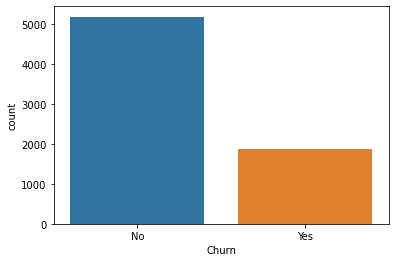

In [12]:
# Let's analyze the target column "Churn"

print(churn_data["Churn"].value_counts())
sns.countplot(churn_data["Churn"])

Now it's clear that class imbalance issue exists.

<AxesSubplot:xlabel='gender', ylabel='count'>

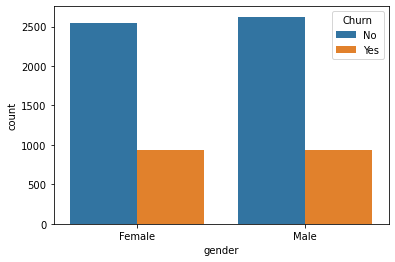

In [13]:
# Let's check gender wise business

sns.countplot(x="gender", data=churn_data, hue="Churn")

<AxesSubplot:xlabel='Partner', ylabel='count'>

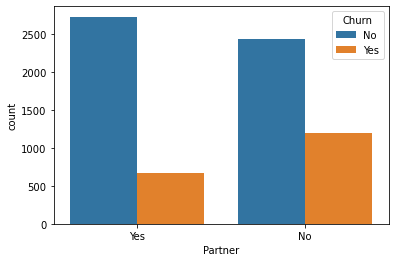

In [14]:
# Let's check the lose of Partner on business

sns.countplot(x="Partner", data=churn_data, hue="Churn")

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

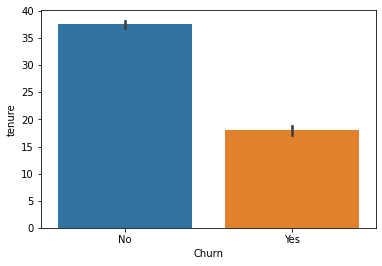

In [15]:
# Let's check the effect of subscription (tenure) on churn

sns.barplot(x="Churn", y="tenure",data=churn_data)

Most customers didn't subscribed the services for long time. So, this is the major effect on business.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

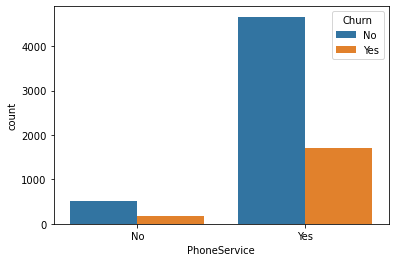

In [16]:
# Let's check how Phone Service effects the business

sns.countplot(x="PhoneService", data=churn_data, hue="Churn")

PhoneService is playing major role in the business means need to improve the PhoneServices...

<AxesSubplot:xlabel='Dependents', ylabel='count'>

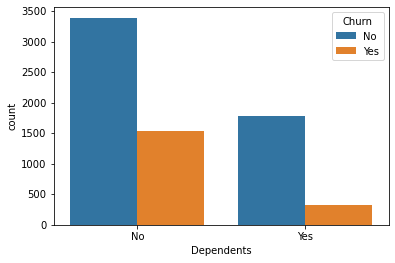

In [17]:
# Let's check how Dependents effect on business

sns.countplot(x="Dependents", data=churn_data, hue="Churn")

The customer who has more dependents get affects on business..

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

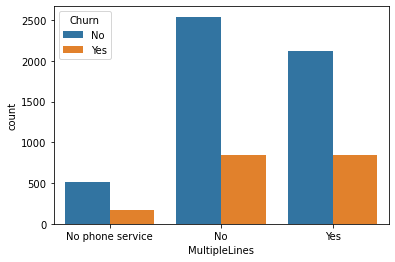

In [18]:
# Let's check how MultipleLInes effect on business

sns.countplot(x="MultipleLines", data=churn_data, hue="Churn")

<AxesSubplot:xlabel='InternetService', ylabel='count'>

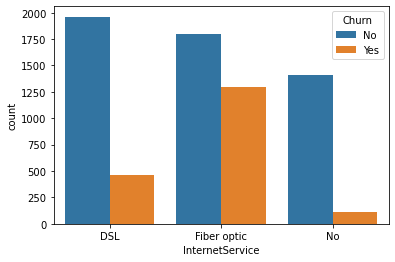

In [19]:
# Let's check how InternetService effect on business

sns.countplot(x="InternetService", data=churn_data, hue="Churn")

The customer who has Fiber Optic InternetServices get more effects on churn.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

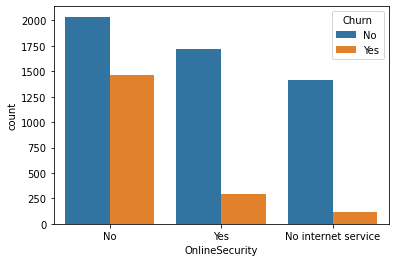

In [20]:
# Let's check how OnlineSecurity effect on business

sns.countplot(x="OnlineSecurity", data=churn_data, hue="Churn")

OnlineService is playing the major role in the business. The customers who does not have InternetServices they play major role in churn. So, need to provide the Online Secirity..

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

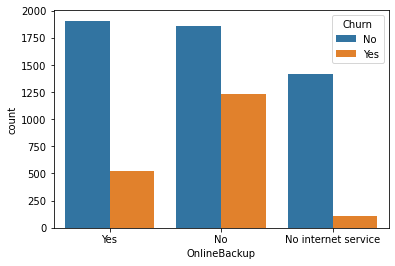

In [21]:
# Let's check how OnlineBackup effect on business

sns.countplot(x="OnlineBackup", data=churn_data, hue="Churn")

Need to provide the OnlineBackup Service because who does not have the Online Backup they moved...

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

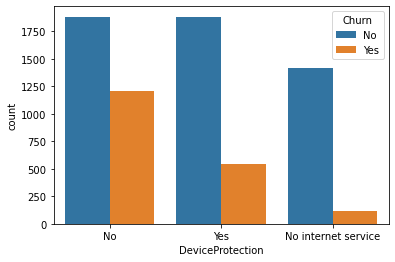

In [22]:
# Let's check how DeviceProtection effect on business

sns.countplot(x="DeviceProtection", data=churn_data, hue="Churn")

Need to provide the DeviceProtection if want to improve the business...

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

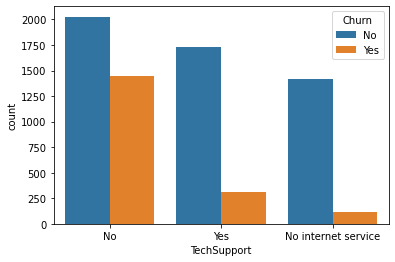

In [23]:
# Let's check how TechSupport effect on business

sns.countplot(x="TechSupport", data=churn_data, hue="Churn")

Need to provide the TechServices to the customers...

<AxesSubplot:xlabel='Contract', ylabel='count'>

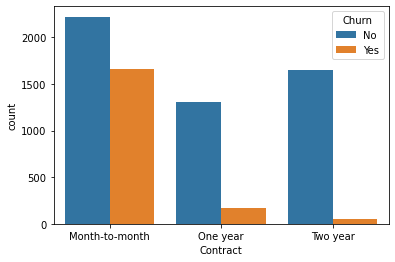

In [24]:
# Let's check how Contract effect on business

sns.countplot(x="Contract", data=churn_data, hue="Churn")

The customers who has month-to-month billing, they generally moved. So, need to focus on yearly+ contracts...

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

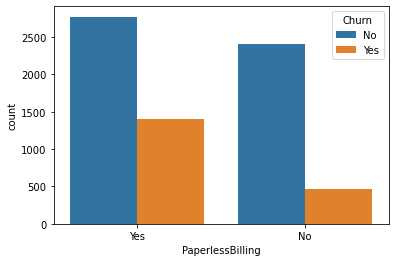

In [25]:
# Let's check how PaperlessBilling effect on business

sns.countplot(x="PaperlessBilling", data=churn_data, hue="Churn")

Need to provide the paperless services to customers...

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

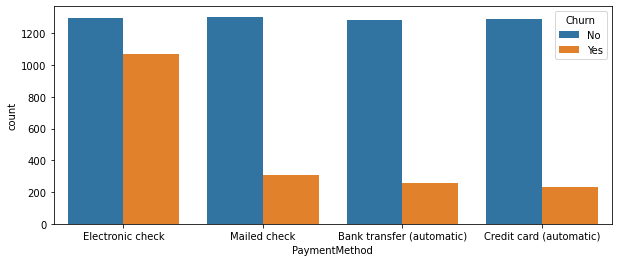

In [26]:
# Let's check how PaymentMethod effect on business

plt.figure(figsize=(10,4))
sns.countplot(x="PaymentMethod", data=churn_data, hue="Churn")

Most customers believe on credit card payment and automatic bank transfer payment. So, need to focus on this...

In [27]:
# Let's check the skewness

churn_data.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

In [29]:
# Let's remove the skewness

for index in churn_data.skew().index:
    if churn_data.skew().loc[index]>0.5:
        churn_data[index] = np.log1p(churn_data[index])
    if churn_data.skew().loc[index]<-0.5:
        churn_data[index] = np.square(churn_data[index])

In [30]:
# Let's check the skewness again

churn_data.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -0.354655
dtype: float64

Senior Citizen is in classification form so it's skewness does not matter and rest numerical are in skewness range..

In [31]:
# Let's convert the target column categorical to classification

churn_data["Churn"].replace({"Yes":1, "No":0}, inplace=True)
churn_data["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [32]:
# Let's convert the all categorial column to numerical form

churn_data = pd.get_dummies(churn_data, drop_first=True)
print("Shape of the Dataset : ",churn_data.shape)

Shape of the Dataset :  (7043, 31)


In [35]:
# Let's separate the input and output columns

x = churn_data.drop(columns = ["Churn"], axis=1)
y = churn_data["Churn"]

As we already discussed that our target column has class imbalance issue. So, let's balance it by SMOTE technique...

1    5174
0    5174
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

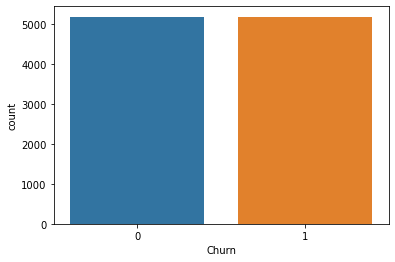

In [38]:
# Let's balance the classes

from imblearn.over_sampling import SMOTE

smt = SMOTE()
x,y = smt.fit_resample(x,y)

print(y.value_counts())
sns.countplot(y)

Number of components explained 99% variance :  20


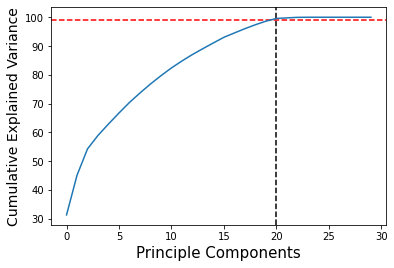

In [41]:
# Let's check the PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scale = StandardScaler()
df_x = scale.fit_transform(x)

x_pca = PCA()
x_pca.fit(df_x)

var_cumu = np.cumsum(x_pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>99)

print("Number of components explained 99% variance : ",k)
plt.xlabel("Principle Components", fontsize=15)
plt.ylabel("Cumulative Explained Variance", fontsize=14)
plt.axvline(x=k, color='k', linestyle='--')
plt.axhline(y=99, color='r', linestyle='--')
plt.plot(var_cumu)
plt.show()

It seems that out of 31 columns, only 20 columns is giving the 99% variance. So, let's use the PCA for Model Building.

In [45]:
# Let's use the PCA for better result

pca = PCA(n_components=20)
X = pca.fit_transform(df_x)
X

array([[-0.20377038, -2.67369934,  3.92995205, ...,  0.91083524,
         0.06695945, -0.13628544],
       [-0.11483898,  0.21162964,  1.60819472, ..., -0.18711239,
         0.34470994, -0.79903337],
       [ 0.00858304, -1.51965534,  1.29842992, ...,  0.021729  ,
         0.55263857, -0.07200668],
       ...,
       [-1.47206219, -1.62766495, -1.10246375, ...,  0.015499  ,
         0.01417413, -0.51991527],
       [-1.06532833, -2.1581971 , -1.02682892, ..., -0.21269509,
        -0.51542782, -0.58731495],
       [-0.62632711, -2.95609471, -0.77171913, ..., -0.0177358 ,
        -0.52667354, -0.33211903]])

In [46]:
# Let's import the necessary libraries for model building

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, plot_roc_curve
from time import time

In [79]:
# Let's find the best random state

def bestmod(mod):
    max_score = 0
    max_state = 0
    start = time()
    for i in range(1,401):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.21, random_state = i)
        mod.fit(x_train, y_train)
        y_pre = mod.predict(x_test)
        score = accuracy_score(y_test, y_pre)
        if score > max_score:
            max_score = score
            max_state = i
    print("Best Random State is      : ",max_state)
    print("Best Accuracy Score is    : ",max_score)
    print("Cross Validation Score is : ",cross_val_score(mod, X, y, cv=5).mean())
    end = time()
    print("Time taken by model for prediction {:.4f} seconds".format(end-start))

In [80]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
bestmod(LR)

Best Random State is      :  59
Best Accuracy Score is    :  0.827046918123275
Cross Validation Score is :  0.8002580536701199
Time taken by model for prediction 12.6328 seconds


In [81]:
def bestmodel(model):
    start = time()
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.21, random_state = 59)
    model.fit(x_train, y_train)
    y_pre = model.predict(x_test)
    score = accuracy_score(y_test, y_pre)
    print("Best Accuracy Score is    : ",score)
    print("Cross Validation Score is : ",cross_val_score(model, X, y, cv=5).mean())
    end = time()
    print("Time taken by model for prediction {:.4f} seconds".format(end-start))

In [82]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
bestmodel(DTC)

Best Accuracy Score is    :  0.7759889604415824
Cross Validation Score is :  0.7672104192788413
Time taken by model for prediction 2.4585 seconds


In [83]:
# K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
bestmodel(KNC)

Best Accuracy Score is    :  0.8100275988960441
Cross Validation Score is :  0.7970698813634909
Time taken by model for prediction 4.3397 seconds


In [84]:
# Support Vector Machine

from sklearn.svm import SVC
svc = SVC()
bestmodel(svc)

Best Accuracy Score is    :  0.8325666973321068
Cross Validation Score is :  0.8090548539166859
Time taken by model for prediction 35.2141 seconds


In [85]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
bestmodel(RFC)

Best Accuracy Score is    :  0.8261269549218031
Cross Validation Score is :  0.8133085366451622
Time taken by model for prediction 31.7689 seconds


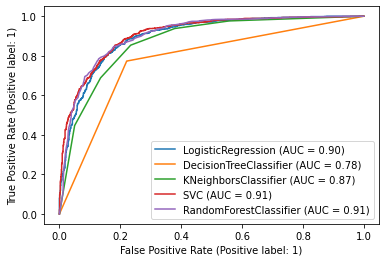

In [87]:
# Let's plot ROC AUC curve

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.21, random_state = 59)

disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(KNC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plt.legend(prop={"size":10}, loc="lower right")
plt.show()

#### After analyzing the accuracy score, cross validation score and ROC AUC curve. Now it is clear that Support Vector Classifier is giving the best score. So, let's try to increase the accuracy score using Hyperparameter Tuning.

In [95]:
# Final Model with Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {"kernel" : ["sigmoid", "rbf"], "gamma" : ["scale", "auto"],
             "cache_size" : [200,300], "random_state": [55,56,57,58,59,60]}

grid_search = GridSearchCV(svc, param_grid)
grid_search.fit(x_train, y_train)
grid_search.best_params_

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.21, random_state = 56)
Final_Churn_Model = SVC(kernel="rbf", gamma="auto", cache_size=200, random_state = 56)
Final_Churn_Model.fit(x_train, y_train)
y_pred = Final_Churn_Model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8380864765409384

In [96]:
# Saving the Final Model

import joblib

joblib.dump(Final_Churn_Model, "Final_Churn_Model.pkl")

['Final_Churn_Model.pkl']